**[This walkthrough is also available as a Jupyter ipynb Notebook - you can run yourself](notebooks/ex_WhatCanDo.ipynb)**

The purpose of this library is to help people with a grasp of JavaScript to leverage leverage Jupyter Notebooks without having to learn Python.

Notebooks are a way to explore and experiment, in addition to write and explain ideas.

(Essentially, they are data driven documents with both formatted text married next to code that can show some output)

**All of the tutorials provided here, including this one, was written as a notebook and simply exported.**

![Screenshot](../img/started_jupyterSideBySide.jpg)

The document itself is a list of cells that can be either:
* Text or Markdown (like this)
* Or Code Results (NodeJS code in this case)

![Screenshot of Animation](../img/noiseFinal.gif)

**note: You can choose whether to show the code or simply show the results.**

*We often include the code for illustration purposes in these tutorials, but many documents we write do not show them at all.*

## This Library helps with the Coding Side of Things

So you can focus on what you want to work on:

* Loading Data
* Manipulating and Refining into Information
* Aggregating and Exploring
* Formatting and Visualizing
* and Exporting

And as this uses [nriesco's iJavaScript Jupyter Kernel](http://n-riesco.github.io/ijavascript/), this can be one module of many npm modules as you grow.

* Storing Secrets - like with [dotenv](https://www.npmjs.com/package/dotenv) or others
* Working with Cloud Metadata - like with [jsforce](https://jsforce.github.io/)
* More aggregation control - similar to Pandas with [Danfo.js](https://danfo.jsdata.org/), or [others](https://www.npmjs.com/package/dataframe-js)
* Machine Learning - with GPU enabled TensorFlows with [tfjs](https://www.npmjs.com/package/@tensorflow/tfjs-node-gpu)
* and many many others

Just to let out the air a little bit, notebooks don't give complete control over how it looks.

While it also lets you run code, it is also not a full blown IDE (but [many IDEs even support it natively](https://code.visualstudio.com/docs/datascience/jupyter-notebooks))

However, it gives you a great way to explore and share ideas.

Come see if it might work for you.

## Why not Python?

Jupyter Lab (the latest interface for Jupyter), and many other notebooks are installed and even developed using Python.

However, I've found quite a few people that would really get a benefit of working with Notebooks - but without having to also learn Python.

For those JavaScript Developers that are looking to better understand Python, we developed a [Python for JavaScript Developers book here](https://github.com/paulroth3d/python-for-js-developers) - pull requests always welcome.

Additionally, [ObservableHQ](https://observablehq.com/tutorials) provides a really great experience for those familiar with JavaScript - [although it isn't technically JavaScript](https://observablehq.com/@observablehq/observables-not-javascript) and also worth a look.

For example: [Lionel Radisson's creative coding](https://observablehq.com/@makio135/creative-coding),
and [many others](https://observablehq.com/explore)

## At first glance, notebooks can seem like pretty documentation

In [1]:
utils = require('jupyter-ijavascript-utils');
['utils']

[ 'utils' ]

The notebook is written as a collection of `cells` that essentially are either:

* words to explain the concept
* or bits of code that can execute and provide a result

**(NOTE: Cells can be hidden or shown. They are shown here for clarity, but do not need to be)**

![Screenshot of Cells in Jupyter](../img/howToUse_cellsBuilding.png)

And because each idea can be stored in a separate block (which can be a paragraph or sections, etc), it becomes quite easy to rearrange ideas.

This can be enormously helpful in explaining a concept, or even templatizing it:

* Load in Data
* Provide a bit of context
* Show pretty graphs
* Give details (either text or code) as needed.

## How does Jupyter Work?

When rendering the document, cells that are code are sent to the Kernel to ask what the response is that it should render.

Jupyter by itself doesn't understand the code, it just passes it to a program that does - and this is called a 'Kernel'

This allows Jupyter to work with all kinds of languages, like:

* Ruby
* Python
* Perl
* C++

[Or see the full list of current Kernels from Jupyter's website](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

Here, we assume we'll be using [nriesco's iJavaScript Kernel for Jupyter](https://github.com/n-riesco/ijavascript), as it provides JavaScript support for Jupyter.

## Data Driven Notebooks

Even better, the text you provide can be data driven...

In [2]:
// # minutes gap between appointments
bufferBetweenAppointments = 0;

// # resources per site
schedulableResourcesPerSite = 30;

// # minutes duration per appointment
appointmentDuration = 10;

// # appointments desired per site per day
appointmentsPerSitePerDay = 3500;

// # hours that vaccines are distributed
vaccineHoursPerDay = 8;

// # doses per vial
dosesPerVial = 10;

//-- opening hour of the day
openingHour = 8; // (8 = 8 am)

8

In [3]:
//-- calculations

//-- number of vials consumed per day
totalVialsConsumed = Math.max(appointmentsPerSitePerDay / dosesPerVial);

//-- effective time between scheduled appointments
delayBetweenAppointments = appointmentDuration + bufferBetweenAppointments;

//-- number of appointments per hour per resource
appointmentsPerHour = 60 / (appointmentDuration + bufferBetweenAppointments);

//-- minute start of the day
openingMinute = openingHour * 60;

//-- number of appointment slots we will need throughout the day
numAppointmentSlots = Math.ceil(appointmentsPerSitePerDay / schedulableResourcesPerSite);

newline = '<br />';

formatN = (n, specificity = 0) => {
    return n.toFixed(specificity);
}

[Function: formatN]

## Example Data Driven Markdown

In [4]:
utils.ijs.markdown(`# How many appointments could we do?

This can be a frequent question when we're trying to figure out Vaccinations.

Leaving the technical bit alone, there are only so many actual appointment slots available per day.

Assuming that each appointment takes roughly ${appointmentDuration} minutes ${newline}
<span style='color:#999'>(
${
  bufferBetweenAppointments
    ? `with ${bufferBetweenAppointments} minutes between each appointment`
    : 'without any gaps between appointments'
}
)</span> ${newline}
...a nursing station could handle ${formatN(
  appointmentsPerHour,
  2
)} appointments / hour.

With ${schedulableResourcesPerSite} resources, ${newline}
that means ${formatN(
  appointmentsPerHour * schedulableResourcesPerSite,
  2
)} appointments per hour.

If we wanted to vaccinate ${formatN(
  appointmentsPerSitePerDay
)} people per day,${newline}
**it would take about ${formatN(
  appointmentsPerSitePerDay / appointmentsPerHour / schedulableResourcesPerSite
)} hours to complete them all**

... and thats assuming all shifts hand off flawlessly.
`);

# How many appointments could we do?

This can be a frequent question when we're trying to figure out Vaccinations.

Leaving the technical bit alone, there are only so many actual appointment slots available per day.

Assuming that each appointment takes roughly 10 minutes <br />
<span style='color:#999'>(
without any gaps between appointments
)</span> <br />
...a nursing station could handle 6.00 appointments / hour.

With 30 resources, <br />
that means 180.00 appointments per hour.

If we wanted to vaccinate 3500 people per day,<br />
**it would take about 19 hours to complete them all**

... and thats assuming all shifts hand off flawlessly.


In [5]:
//-- create an array for each appointment slot
doseSchedule = utils.array.arrange(numAppointmentSlots)
    .map((appointmentSlotNumber) => ({
        //-- doses are based on the number of resources * schedulable slots
        doses: appointmentSlotNumber * schedulableResourcesPerSite,
        datetime: new Date(2022, 1, 1, 0,
            openingMinute
            + appointmentSlotNumber * (appointmentDuration + bufferBetweenAppointments)
        )
    }));

//-- show a couple example values to get a sense of the objects
doseSchedule.slice(0, 10)

[
  { doses: 0, datetime: 2022-02-01T14:00:00.000Z },
  { doses: 30, datetime: 2022-02-01T14:10:00.000Z },
  { doses: 60, datetime: 2022-02-01T14:20:00.000Z },
  { doses: 90, datetime: 2022-02-01T14:30:00.000Z },
  { doses: 120, datetime: 2022-02-01T14:40:00.000Z },
  { doses: 150, datetime: 2022-02-01T14:50:00.000Z },
  { doses: 180, datetime: 2022-02-01T15:00:00.000Z },
  { doses: 210, datetime: 2022-02-01T15:10:00.000Z },
  { doses: 240, datetime: 2022-02-01T15:20:00.000Z },
  { doses: 270, datetime: 2022-02-01T15:30:00.000Z }
]

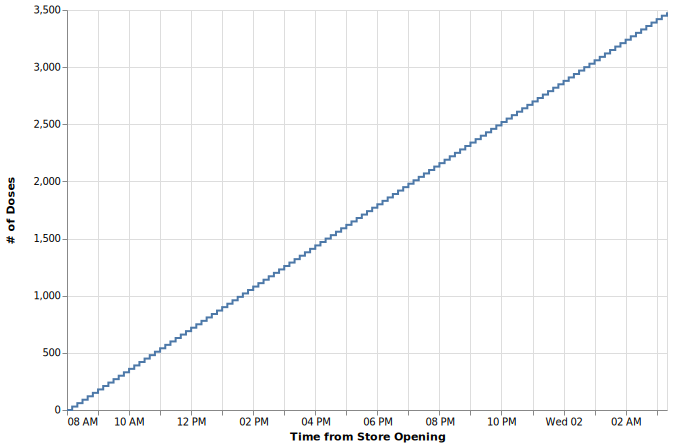

In [6]:
utils.vega.svg((vl) => vl.markLine({ interpolate: 'step-after'})
    .data(doseSchedule)
    .width(600)
    .height(400)
    .encode(
        vl.y().fieldQ('doses').title('# of Doses'),
        vl.x().fieldT('datetime').title('Time from Store Opening')
    ))

(See the [vega module for examples on how this chart was made](https://jupyter-ijavascript-utils.onrender.com/module-vega.html))

# Loading Your Data into a Notebook

Because we are working with a JavaScript/Node Kernel that works within Jupyter, loading your data into Jupyter can be done the same way you've always loaded data into NodeJS.

We wanted to make this simpler however, and provided a [File module](https://jupyter-ijavascript-utils.onrender.com/module-file.html) for common needs:

* loading in JSON
* loading in text
* writing JSON to a file
* writing text to a file
                                                                    

For Example:

In [7]:
initializeWeather = () => [
  { id: 1, city: 'Seattle',  month: 'Aug', precip: 0.87 },
  { id: 0, city: 'Seattle',  month: 'Apr', precip: 2.68 },
  { id: 2, city: 'Seattle',  month: 'Dec', precip: 5.31 },
  { id: 3, city: 'New York', month: 'Apr', precip: 3.94 },
  { id: 4, city: 'New York', month: 'Aug', precip: 4.13 },
  { id: 5, city: 'New York', month: 'Dec', precip: 3.58 },
  { id: 6, city: 'Chicago',  month: 'Apr', precip: 3.62 },
  { id: 8, city: 'Chicago',  month: 'Dec', precip: 2.56 },
  { id: 7, city: 'Chicago',  month: 'Aug', precip: 3.98 }
];
weather = initializeWeather();

[
  { id: 1, city: 'Seattle', month: 'Aug', precip: 0.87 },
  { id: 0, city: 'Seattle', month: 'Apr', precip: 2.68 },
  { id: 2, city: 'Seattle', month: 'Dec', precip: 5.31 },
  { id: 3, city: 'New York', month: 'Apr', precip: 3.94 },
  { id: 4, city: 'New York', month: 'Aug', precip: 4.13 },
  { id: 5, city: 'New York', month: 'Dec', precip: 3.58 },
  { id: 6, city: 'Chicago', month: 'Apr', precip: 3.62 },
  { id: 8, city: 'Chicago', month: 'Dec', precip: 2.56 },
  { id: 7, city: 'Chicago', month: 'Aug', precip: 3.98 }
]

We can write that value to a file, or read the file in a similar way

```
//-- store to file if desired
utils.file.writeJSON('./data/weather.json', weather);

//-- or rehydrate again at a later time
const myWeather = utils.file.readJSON('./data/weather.json');
myWeather.length; // 9
```

## Working with Text Files

You can also work with Text files and use it based on the current path:

```
sillySong = utils.file.load('../data/pirates.txt');

sillySong.split(/\n[ \t]*\n/)        // split on multiple line breaks
  .map(stanza => stanza.split(/\n/)  // split lines by newline
    .map(line => line.trim())        // trim each line
  );
sillySong[0][0]; // I am the very model of a modern Major-General,
```

## Working with CSV or Other Data Types

If you need to load in CSV, review NPM to find packages that could work for you.

For example, I am quite a fan of [D3 JS](https://github.com/d3/d3-dsv) and can be done as simple as:

```
d3.csvParse("foo,bar\n1,2"); // [{foo: "1", bar: "2"}, columns: ["foo", "bar"]]
d3.tsvParse("foo\tbar\n1\t2"); // [{foo: "1", bar: "2"}, columns: ["foo", "bar"]]
```

but others, like the [Node CSV package](https://github.com/adaltas/node-csv) is also good and has 0 dependencies.
                                            
Working with very large CSV files is best to work with a File Stream, with many options available there.
                                        
I've also had very good luck with libraries such as [scramjet](https://www.npmjs.com/package/scramjet) or [rxjs](https://rxjs.dev/) and multiple workers.

# Grouping and Exploring

As with many of the tutorials we show here, many leverage the wonderful [vega datasets](https://github.com/vega/vega-datasets), understanding the data is a crucial first step in helping to explain it to others.

Once you have the data, we provide a few additional tools you can use:

* [Generate a Schema](https://jupyter-ijavascript-utils.onrender.com/module-object.html#.generateSchema) for your array
* [Get the Object Property Types](https://jupyter-ijavascript-utils.onrender.com/module-object.html#.getObjectPropertyTypes) for your array

```
utils.object.generateSchema(weather)
// {
//   "$schema": "http://json-schema.org/draft-04/schema#",
//   "type": "array",
//   "items": {
//     "type": "object",
//     "properties": {
//       "id": {
//         "type": "number"
//       },
//       "city": {
//         "type": "string"
//       },
//       "month": {
//         "type": "string"
//       },
//       "precip": {
//         "type": "number"
//       }
//     },
//     "required": [
//       "id",
//       "city",
//       "month",
//       "precip"
//     ]
//   }
// }
```

## Grouping

Additionally, grouping can be crucial in understanding the true shape of your data.

For example:

```
initializeWeather = () => [
  { id: 1, city: 'Seattle',  month: 'Aug', precip: 0.87 },
  { id: 0, city: 'Seattle',  month: 'Apr', precip: 2.68 },
  { id: 2, city: 'Seattle',  month: 'Dec', precip: 5.31 },
  { id: 3, city: 'New York', month: 'Apr', precip: 3.94 },
  { id: 4, city: 'New York', month: 'Aug', precip: 4.13 },
  { id: 5, city: 'New York', month: 'Dec', precip: 3.58 },
  { id: 6, city: 'Chicago',  month: 'Apr', precip: 3.62 },
  { id: 8, city: 'Chicago',  month: 'Dec', precip: 2.56 },
  { id: 7, city: 'Chicago',  month: 'Aug', precip: 3.98 }
];
weather = initializeWeather();
```

We can then identify which records belong to which city by the `group by` function:

```
utils.group.by(weather, 'city')
```

```
// SourceMap(3) [Map] {
//   'Seattle' => [
//     { id: 1, city: 'Seattle', month: 'Aug', precip: 0.87 },
//     { id: 0, city: 'Seattle', month: 'Apr', precip: 2.68 },
//     { id: 2, city: 'Seattle', month: 'Dec', precip: 5.31 }
//  ],
//   'New York' => [
//     { id: 3, city: 'New York', month: 'Apr', precip: 3.94 },
//    { id: 4, city: 'New York', month: 'Aug', precip: 4.13 },
//     { id: 5, city: 'New York', month: 'Dec', precip: 3.58 }
//   ],
//   'Chicago' => [
//     { id: 6, city: 'Chicago', month: 'Apr', precip: 3.62 },
//     { id: 8, city: 'Chicago', month: 'Dec', precip: 2.56 },
//     { id: 7, city: 'Chicago', month: 'Aug', precip: 3.98 }
//   ],
//   source: 'city'
// }
```

You can then access those records based on the map index:

```
utils.group.by(weather, 'city')['Seattle'];

// [
//     { id: 1, city: 'Seattle', month: 'Aug', precip: 0.87 },
//     { id: 0, city: 'Seattle', month: 'Apr', precip: 2.68 },
//     { id: 2, city: 'Seattle', month: 'Dec', precip: 5.31 }
// ]
```

You can even group by multiple groups to get more fine grained collections:

```
or using multiple groups: utils.group.by(weather, 'month', 'city')

// provides:
// SourceMap(3) [Map] {
//   'Aug' => SourceMap(3) [Map] {
//     "Seattle" => [{ "id": 1, "city": "Seattle", "month": "Aug", "precip": 0.87 }]
//     "New York" => [{"id": 4, "city": "New York", "month": "Aug", "precip": 4.13}]
//     "Chicago" => [{"id": 7, "city": "Chicago", "month": "Aug", "precip": 3.98}]
//     source: 'city'
//   },
//   'Apr' => SourceMap(3) [Map] {
//     "Seattle" => [{"id": 0, "city": "Seattle", "month": "Apr", "precip": 2.68}]
//     "New York" => [{"id": 3, "city": "New York", "month": "Apr", "precip": 3.94}]
//     "Chicago" => [{"id": 6, "city": "Chicago", "month": "Apr", "precip": 3.62}]
//     source: 'city'
//   },
//   'Dec' => SourceMap(3) [Map] {
//     "Seattle" => [{"id": 2, "city": "Seattle", "month": "Dec", "precip": 5.31}]
//     "New York" => [{"id": 5, "city": "New York", "month": "Dec", "precip": 3.58}]
//     "Chicago" => [{"id": 8, "city": "Chicago", "month": "Dec", "precip": 2.56}]
//     source: 'city'
//   },
//   source: 'month'
// }
```

(see the [Group By module](https://jupyter-ijavascript-utils.onrender.com/module-group.html) for more)

## Aggregating

You can also aggregate the entire collection:

```
utils.aggregate.unique(weather, 'city');
// [ 'Seattle', 'New York', 'Chicago' ]
```

Or reduce after grouping

```
utils.group.by(weather, 'city')
    .reduce((group) => ({
      min: utils.agg.min(group, 'precip'),
      max: utils.agg.max(group, 'precip'),
      avg: utils.agg.avgMean(group, 'precip')
    }));

// [
//   { city: 'Seattle', min: 0.87, max: 5.31, avg: 2.953333333333333 },
//   { city: 'New York', min: 3.58, max: 4.13, avg: 3.8833333333333333 },
//   { city: 'Chicago', min: 2.56, max: 3.98, avg: 3.3866666666666667 }
// ]
```

Even rolling your own if you would prefer:

```
utils.group.rollup(weather, r => r.length, 'city', 'year')

//  SourceMap(3) [Map] {
//   'Seattle' => SourceMap(2) [Map] { 2020 => 2, 2021 => 1, source: 'year' },
//   'New York' => SourceMap(2) [Map] { 2021 => 1, 2020 => 2, source: 'year' },
//   'Chicago' => SourceMap(2) [Map] { 2021 => 1, 2020 => 2, source: 'year' },
//   source: 'city'
// }
```

(See the [Aggregate Module for more](https://jupyter-ijavascript-utils.onrender.com/module-aggregate.html))

# Joining data

In addition to aggregating data, we may want to join the data to another dataset

In [8]:
weatherByCity = utils.group.by(weather, 'city')
    .reduce((group) => ({
      min: utils.agg.min(group, 'precip'),
      max: utils.agg.max(group, 'precip'),
      avg: utils.agg.avgMean(group, 'precip')
    }));

[
  { city: 'Seattle', min: 0.87, max: 5.31, avg: 2.953333333333333 },
  { city: 'New York', min: 3.58, max: 4.13, avg: 3.8833333333333333 },
  { city: 'Chicago', min: 2.56, max: 3.98, avg: 3.3866666666666667 }
]

In [9]:
cityLocations = [{ city: 'Chicago', state: 'IL', lat: 41.8781, lon: -87.6298 },
                { city: 'New York', state: 'NY', lat: 40.7128, lon: -74.0060 },
                { city: 'Seattle', state: 'WA', lat: 47.6062, lon: -122.3321 }];

[
  { city: 'Chicago', state: 'IL', lat: 41.8781, lon: -87.6298 },
  { city: 'New York', state: 'NY', lat: 40.7128, lon: -74.006 },
  { city: 'Seattle', state: 'WA', lat: 47.6062, lon: -122.3321 }
]

In [10]:
cityLocationMap = utils.object.mapByProperty(cityLocations, 'city');

Map(3) {
  'Chicago' => { city: 'Chicago', state: 'IL', lat: 41.8781, lon: -87.6298 },
  'New York' => { city: 'New York', state: 'NY', lat: 40.7128, lon: -74.006 },
  'Seattle' => { city: 'Seattle', state: 'WA', lat: 47.6062, lon: -122.3321 }
}

In [11]:
utils.object.joinProperties(weatherByCity, 'city', cityLocationMap, 'state', 'lat', 'lon')

// [
//   { city: 'Seattle', min: 0.87, max: 5.31, avg: 2.953333333333333, statelat: 47.6062, lon: 122.3321, state: 'WA' },
//   { city: 'New York', min: 3.58, max: 4.13, avg: 3.8833333333333333, lat: 40.7128, lon: 74.006, state: 'NY' },
//   { city: 'Chicago', min: 2.56, max: 3.98, avg: 3.3866666666666667, lat: 41.8781, lon: 87.6298, state: 'IL' }
// ]

[
  {
    city: 'Seattle',
    min: 0.87,
    max: 5.31,
    avg: 2.953333333333333,
    state: 'WA',
    lat: 47.6062,
    lon: -122.3321
  },
  {
    city: 'New York',
    min: 3.58,
    max: 4.13,
    avg: 3.8833333333333333,
    state: 'NY',
    lat: 40.7128,
    lon: -74.006
  },
  {
    city: 'Chicago',
    min: 2.56,
    max: 3.98,
    avg: 3.3866666666666667,
    state: 'IL',
    lat: 41.8781,
    lon: -87.6298
  }
]

or an alternative using vanilla JavaScript

In [12]:
weatherByCity = weatherByCity.map((entry) => {
    const { state, lat, lon } = cityLocationMap.get(entry.city);
    return ({ ...entry, state, lat, lon });
});

// [
//   { city: 'Seattle', min: 0.87, max: 5.31, avg: 2.953333333333333, lat: 47.6062, lon: 122.3321 },
//   { city: 'New York', min: 3.58, max: 4.13, avg: 3.8833333333333333, lat: 40.7128, lon: 74.006 },
//   { city: 'Chicago', min: 2.56, max: 3.98, avg: 3.3866666666666667, lat: 41.8781, lon: 87.6298 }
// ]

[
  {
    city: 'Seattle',
    min: 0.87,
    max: 5.31,
    avg: 2.953333333333333,
    state: 'WA',
    lat: 47.6062,
    lon: -122.3321
  },
  {
    city: 'New York',
    min: 3.58,
    max: 4.13,
    avg: 3.8833333333333333,
    state: 'NY',
    lat: 40.7128,
    lon: -74.006
  },
  {
    city: 'Chicago',
    min: 2.56,
    max: 3.98,
    avg: 3.3866666666666667,
    state: 'IL',
    lat: 41.8781,
    lon: -87.6298
  }
]

# Graph and Visualize

Once you have your data aggregated as you would like, then graph or visualize the data as you would like.

For example, using the [Vega-Lite or Vega libraries](https://jupyter-ijavascript-utils.onrender.com/module-vega.html)
                                                     
These can be exported as SVG - meaning it will be included in your export, or embededed - and made interactive within your browser.
                                                     
Or using the [SVG Module](https://jupyter-ijavascript-utils.onrender.com/module-svg.html) - that can also be exported as SVG or embedded.

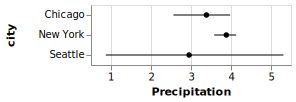

In [13]:
utils.vega.svgFromSpec({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"values": weather},
  "encoding": {"y": {"field": "city", "type": "ordinal"}},
  "layer": [
    {
      "mark": {"type": "point", "filled": true},
      "encoding": {
        "x": {
          "aggregate": "mean",
          "field": "precip",
          "type": "quantitative",
          "scale": {"zero": false},
          "title": "Precipitation"
        },
        "color": {"value": "black"}
      }
    },
    {
      "mark": {"type": "errorbar", "extent": "ci"},
      "encoding": {
        "x": {"field": "precip", "type": "quantitative", "title": "Precipitation"}
      }
    }
  ]
})

(See [the example from Vega-Lite](https://vega.github.io/vega-lite/examples/layer_point_errorbar_ci.html)
 or [the list of all Vega-Lite Examples](https://vega.github.io/vega-lite/examples))

In [14]:
weatherMarkers = weatherByCity.map(({lat, lon, city}) => [lat, lon, city])

[
  [ 47.6062, -122.3321, 'Seattle' ],
  [ 40.7128, -74.006, 'New York' ],
  [ 41.8781, -87.6298, 'Chicago' ]
]

In [15]:
utils.leaflet.renderMarkers(weatherMarkers)

![Screenshot of weather markers in a map](../img/weatherMarkersMap.png)

or we could make a [Choropleth - a Data Driven Map](https://jupyter-ijavascript-utils.onrender.com/tutorial-vega_choroplethShort.html) to show the precipitation of the whole state

![Screenshot of Choropleth for Avg Precipitation](../img/weatherPrecipitationChoropleth.png)

# This is only a Taste

This is only a taste of the things that you can do.

What Jupyter / Notebooks provide is a way for you to organize your thoughts and even to present them cleanly.

We can't wait to see what you come up with.